# 数据预处理

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train) , (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainHot = np_utils.to_categorical(y_Train)
y_TestHot = np_utils.to_categorical(y_Test)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape = (28, 28, 1), activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128, activation='relu')) 

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(10, activation='softmax'))

查看模型摘要 

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 进行训练

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
train_history = model.fit(x = x_Train4D_normalize, y = y_TrainHot, 
                          validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 63s - loss: 0.4905 - acc: 0.8473 - val_loss: 0.0973 - val_acc: 0.9724
Epoch 2/10
 - 63s - loss: 0.1406 - acc: 0.9584 - val_loss: 0.0633 - val_acc: 0.9802
Epoch 3/10
 - 60s - loss: 0.1020 - acc: 0.9691 - val_loss: 0.0514 - val_acc: 0.9843
Epoch 4/10
 - 63s - loss: 0.0842 - acc: 0.9749 - val_loss: 0.0454 - val_acc: 0.9859
Epoch 5/10
 - 61s - loss: 0.0718 - acc: 0.9779 - val_loss: 0.0398 - val_acc: 0.9878
Epoch 6/10
 - 64s - loss: 0.0648 - acc: 0.9807 - val_loss: 0.0392 - val_acc: 0.9883
Epoch 7/10
 - 63s - loss: 0.0563 - acc: 0.9829 - val_loss: 0.0433 - val_acc: 0.9874
Epoch 8/10
 - 63s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0333 - val_acc: 0.9901
Epoch 9/10
 - 63s - loss: 0.0441 - acc: 0.9870 - val_loss: 0.0332 - val_acc: 0.9901
Epoch 10/10
 - 68s - loss: 0.0425 - acc: 0.9868 - val_loss: 0.0341 - val_acc: 0.9905


In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):#输入参数：训练产生的train_history,训练数据执行结果,验证数据执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')#显示图例，且位于左上角
    plt.show()

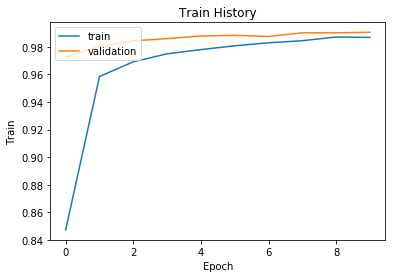

In [21]:
show_train_history(train_history, 'acc', 'val_acc')

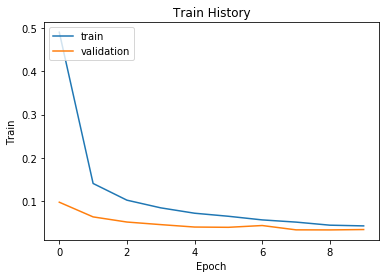

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

# 评估模型的准确率

In [23]:
scores = model.evaluate(x_Test4D_normalize, y_TestHot)
scores[1]

10000/10000 [==============================] - 6s 567us/step


0.9914

# 进行预测

In [24]:
prediction = model.predict_classes(x_Test4D_normalize)

In [25]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [26]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
#函数的参数分别是images（数字图像），labels（真实值），prediction（预测结果），idx(开始显示的数据index)，num(要显示的数据项数，默认是10.不超过25)
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        #绘制图形
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap = 'binary')
        title = 'label=' + str(labels[idx])#设置标题
        if len(prediction)>0:#如果传入了预测结果
            title+= ',predict=' + str(prediction[idx])#标题
        
        ax.set_title(title, fontsize = 10)#设置子图形标题
        ax.set_xticks([]);ax.set_yticks([])#设置不显示刻度
        idx+=1#读取下一项
    plt.show()

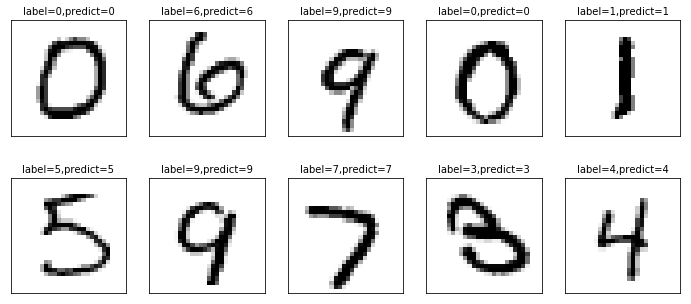

In [27]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=10)

# 显示混淆矩阵

In [28]:
import pandas as pd
pd.crosstab(y_Test, prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1130,1,1,0,1,0,1,1,0
2,2,1,1026,0,1,0,0,2,0,0
3,0,0,0,1005,0,1,0,2,2,0
4,0,0,0,0,975,0,1,0,1,5
5,1,0,0,5,0,883,2,0,0,1
6,4,2,0,0,1,1,949,0,1,0
7,0,1,4,2,0,0,0,1018,1,2
8,2,0,3,2,0,2,0,2,960,3
